# Integrated CA ML for Business and Data Visualisation

In [1]:
#!pip install jupyter_dash
#!pip install dash

In [1]:
#General
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


# Time Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Text Analytics
import sklearn.feature_extraction.text as sk_txt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('FACEBOOK_REVIEWS.csv')

# Data Pre-Processing

In [4]:
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,baecdfaa-fdcf-4ec2-8795-f9e1d0885c3a,167801889669597203549,Om******hy,bad app,1,0,318.0.0.39.154,2021-05-19 20:00:27
1,1,12e913d6-105e-4f0c-bb22-4f6a0561cb18,318460545610239421517,Sa****************ol,Really really annoying app ... like if its not...,1,0,317.0.0.51.119,2021-05-19 20:00:29
2,2,7db12237-0f42-4ef7-873b-99495d575331,530587565711923101092,Ca*********04,Cunsurinimo,1,0,293.0.0.43.120,2021-05-19 20:00:29
3,3,6d48f3e8-54c4-417a-83c9-6b198ef7c516,413352731163292273792,Ar**************07,Bad experience,1,0,318.0.0.39.154,2021-05-19 20:00:30
4,4,c4430a84-d74b-4e24-8ed6-1e28110a355b,972610065867074567951,Ab***********kh,Totally pathetic experience too many ads and b...,1,0,308.0.0.42.118,2021-05-19 20:00:30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994736 entries, 0 to 2994735
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   review_id           object
 2   pseudo_author_id    object
 3   author_name         object
 4   review_text         object
 5   review_rating       int64 
 6   review_likes        int64 
 7   author_app_version  object
 8   review_timestamp    object
dtypes: int64(3), object(6)
memory usage: 205.6+ MB


In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'])

In [10]:
df['review_timestamp'].min(), df['review_timestamp'].max()

(Timestamp('2021-05-19 20:00:27'), Timestamp('2023-11-13 23:23:21'))

In [13]:
df.isna().sum()

review_id                  0
pseudo_author_id           0
author_name                0
review_text              450
review_rating              0
review_likes               0
author_app_version    652863
review_timestamp           0
dtype: int64

In [16]:
df.dropna(inplace=True)
df.isna().sum()

review_id             0
pseudo_author_id      0
author_name           0
review_text           0
review_rating         0
review_likes          0
author_app_version    0
review_timestamp      0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2341493 entries, 0 to 2994735
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   review_id           object        
 1   pseudo_author_id    object        
 2   author_name         object        
 3   review_text         object        
 4   review_rating       int64         
 5   review_likes        int64         
 6   author_app_version  object        
 7   review_timestamp    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 160.8+ MB


## Data Visualisation Part 1

In [19]:
df.describe()

,review_rating,review_likes,review_timestamp
count,2.341493e+06,2.341493e+06,2341493
mean,2.937783e+00,3.510604e+00,2022-04-28 22:59:44.241313536
min,1.000000e+00,0.000000e+00,2021-05-19 20:00:27
25%,1.000000e+00,0.000000e+00,2021-07-16 10:22:16
50%,3.000000e+00,0.000000e+00,2022-02-25 19:34:50
75%,5.000000e+00,0.000000e+00,2022-12-23 00:22:33
max,5.000000e+00,8.418000e+04,2023-11-13 23:23:21
std,1.882540e+00,2.209054e+02,NaN


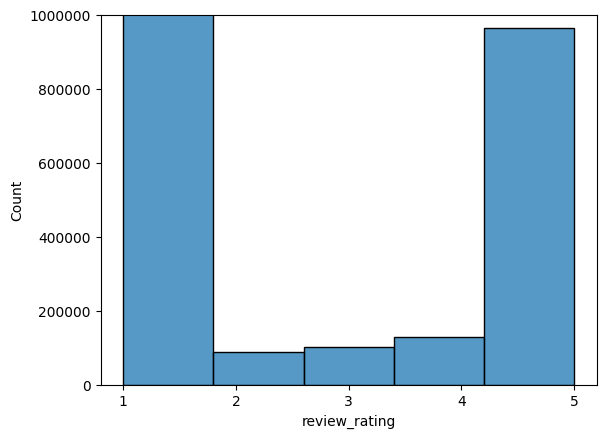

In [18]:
bins = list(set(df['review_rating'].unique()))
ax = sns.histplot(df['review_rating'], bins=5, kde=False)
plt.ticklabel_format(style='plain', axis='y')
ax.set(ylim=(0, 1000000))
ax.set_xticks(bins)
plt.show()

In [23]:
app_average = df.groupby('author_app_version').review_rating.mean().reset_index().sort_values(by='author_app_version')

#### Average Review by App Version on Sample of 10

In [26]:
fig = px.bar(app_average.sample(10),
            x='author_app_version',
            y='review_rating',
            hover_data = {
               'review_rating': ':,.2f' 
            },
            labels = {
                'author_app_version': 'App version',
                'review_rating': 'Average reviews'
            })
fig.show()

In [ ]:
df['Year'] = df['review_timestamp'].dt.year
year = df.groupby(['Year','review_rating']).review_rating.value_counts().reset_index()
fig = px.line(year,
             x='Year',
             y= 'count',
             color = 'review_rating',
             hover_data = {
                 'count': ':,.0f'
             })
fig.show()

### Feature Creation for Time Series Analysis

In [21]:
df['date'] = df['review_timestamp'].dt.date
df['median_rating_per_day'] = df.groupby('date')['review_rating'].transform('median')
df['median_rating_per_day']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
2994731    1.0
2994732    1.0
2994733    1.0
2994734    1.0
2994735    1.0
Name: median_rating_per_day, Length: 2341493, dtype: float64

In [22]:
df['median_rating_per_day'].describe()

count    2.341493e+06
mean     3.717314e+00
std      1.809172e+00
min      1.000000e+00
25%      1.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: median_rating_per_day, dtype: float64